In [1]:
import sys
print(sys.executable)

c:\Users\Admin\AppData\Local\Python\pythoncore-3.11-64\python.exe


In [2]:
import numpy as np

In [3]:
def load_glove_file(filepath):
    embedding_dict = {}
    with open(filepath, 'r', encoding='utf8') as file:
        for line in file:
            values = line.strip().split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embedding_dict[word] = vector
    return embedding_dict

In [4]:
import os
os.getcwd()


'c:\\Users\\Admin\\Desktop\\Varad Mule'

In [5]:
glove_vectors = load_glove_file("glove.6B.100d.txt")

Cosine Similarity

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
def compute_word_similarity(word_a, word_b):
    vec_a = glove_vectors[word_a].reshape(1, -1)
    vec_b = glove_vectors[word_b].reshape(1, -1)
    return cosine_similarity(vec_a, vec_b)[0][0]

In [8]:
print(compute_word_similarity("king", "queen"))

0.7507691


Analogy Solver

In [9]:
def solve_vector_analogy(base, minus, plus):
    new_vector = glove_vectors[base] - glove_vectors[minus] + glove_vectors[plus]
    
    highest_score = -1
    closest_match = None
    
    for term, vec in glove_vectors.items():
        similarity_val = cosine_similarity(
            new_vector.reshape(1, -1),
            vec.reshape(1, -1)
        )[0][0]
        
        if similarity_val > highest_score:
            highest_score = similarity_val
            closest_match = term
            
    return closest_match

In [10]:
print(solve_vector_analogy("king", "man", "woman"))

king


PCA Projection

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [18]:

sample_words = ["king", "queen", "man", "woman", "paris", "france"]

In [19]:
word_matrix = np.array([glove_vectors[w] for w in sample_words])

In [20]:
pca = PCA(n_components=2)
reduced_coords = pca.fit_transform(word_matrix)

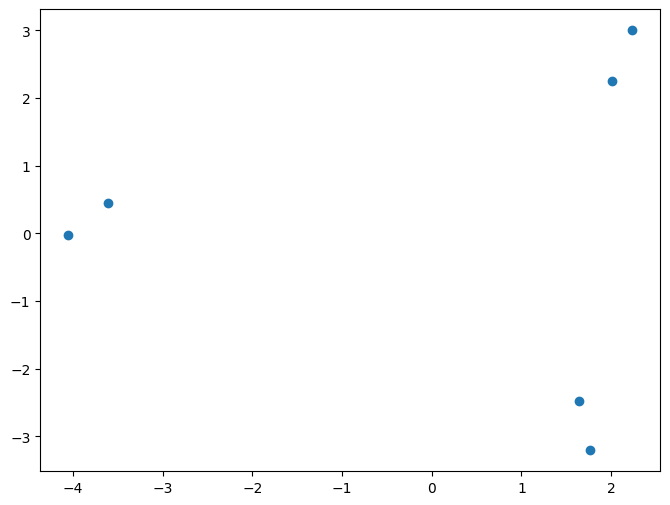

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_coords[:, 0], reduced_coords[:, 1])

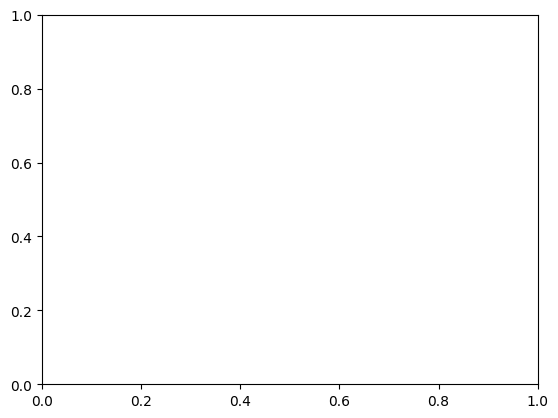

In [22]:
for i, word in enumerate(sample_words):
    plt.annotate(word, (reduced_coords[i, 0], reduced_coords[i, 1]))

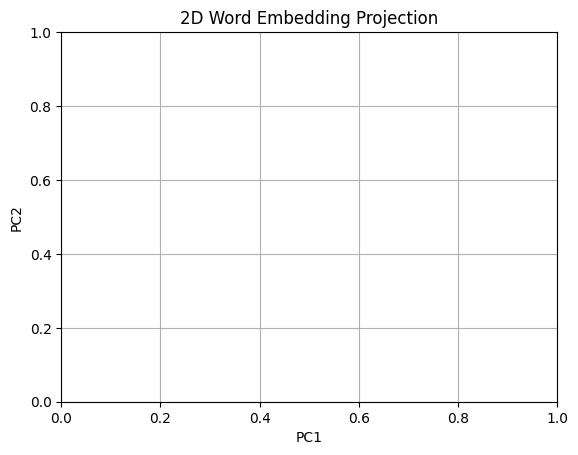

In [23]:
plt.title("2D Word Embedding Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

Word2Vec vs FastText

In [26]:
from gensim.models import Word2Vec, FastText
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
sample_sentences = [
    "machine learning is powerful",
    "deep learning uses neural networks",
    "natural language processing is interesting",
    "word embeddings capture semantic meaning",
    "king queen man woman analogy",
    "artificial intelligence and machine learning",
    "data science involves statistics and programming",
    "fasttext handles out of vocabulary words",
    "word2vec creates word vectors",
    "language models understand context"
]

In [28]:
tokenized_corpus = [sentence.split() for sentence in sample_sentences]

In [29]:
w2v_model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=3,
    min_count=1,
    workers=1
)

In [30]:
fasttext_model = FastText(
    sentences=tokenized_corpus,
    vector_size=100,
    window=3,
    min_count=1,
    workers=1
)

In [31]:
print("Word2Vec Vector for 'learning':")
print(w2v_model.wv["learning"][:10])

Word2Vec Vector for 'learning':
[-0.00053635  0.00023658  0.00510317  0.00901081 -0.00930432 -0.00711746
  0.00645915  0.00897408 -0.00501585 -0.00376409]


In [32]:
print("\nFastText Vector for 'learning':")
print(fasttext_model.wv["learning"][:10])


FastText Vector for 'learning':
[ 1.0890447e-03 -5.3677428e-05 -9.4686565e-04  3.9572993e-04
 -1.9705759e-03 -4.8341215e-04 -5.6992983e-04 -6.7586586e-04
  1.3383367e-03  3.7014444e-04]


In [33]:
similarity_w2v = w2v_model.wv.similarity("machine", "learning")
similarity_ft = fasttext_model.wv.similarity("machine", "learning")

In [34]:
print("\nWord2Vec Similarity (machine, learning):", similarity_w2v)
print("FastText Similarity (machine, learning):", similarity_ft)


Word2Vec Similarity (machine, learning): -0.05985719
FastText Similarity (machine, learning): -0.041750606


In [35]:
print("\nTesting OOV word: 'machinelearning'")


Testing OOV word: 'machinelearning'


In [36]:
try:
    print("Word2Vec:", w2v_model.wv["machinelearning"])
except KeyError:
    print("Word2Vec: Word not found (OOV)")

Word2Vec: Word not found (OOV)


In [37]:
print("FastText:", fasttext_model.wv["machinelearning"][:10])

FastText: [ 5.9371308e-04  2.0775808e-05 -1.9420395e-04 -8.5415802e-04
 -1.5406677e-03 -1.2930612e-03 -8.9197909e-04 -7.6701352e-04
  8.7641872e-04 -3.1448962e-04]
